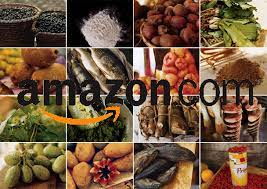
# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews


<h4> Objective:</h4>
Given a review, determine whether the review is positive or negative.

<h4><li>How to determine if a review is positive or negative?</li></h4>
We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.


<h1>Dataset</h1><br>
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

<h4>Attribute Information:</h4>

There are a total of 10 columns in total in the Amazon Fine Food review dataset.

- Id :  Row Id
- ProductId : Unique identifier for the product.
- UserId : Unique identifier for the user.
- ProfileName : Profile Name of the User.
- HelpfulnessNumerator : Number of users who found the review            helpful.
- HelpfulnessDenominator : Number of users who indicated whether they found the review helpful or not.
- Score : Rating between 1 and 5.
- Time : Timestamp for the review.
- Summary : Brief summary of the review.
- Text : Text of the review.

### Importing the necessary libraries.

In [37]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
con_rev = pd.read_csv('/content/drive/MyDrive/Tech_I.S/csv_files/Reviews.csv')

In [40]:
#filtering only positive and negative reviews i.e. not taking into consideration those reviews with Score=3
con_rev.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [41]:
filtered_data = con_rev[con_rev['Score']!=3]
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
# Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.
def partition(x):
    if x < 3:
        return 0
    return 1

In [43]:
#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(3)

Number of data points in our data (525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


## Exploratory Data Analysis

#### Data Cleaning: Deduplication



In [44]:
subset = {"UserId", "ProfileName", "Time", "Text"}
data = filtered_data.drop_duplicates(subset=subset, keep="first")
print(data.shape)
data.head(3)

(364173, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [45]:
#Checking to see how much % of data still remains
(data['Id'].size)/(filtered_data['Id'].size)*100

69.25890143662969

HelpfulnessNumerator - number of users who found the review helpful <br>
HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not

In [46]:
#Checking IS 'HelpfulnessNumerator' always less than or equal to 'HelpfulnessDenominator' ?
data[data['HelpfulnessNumerator'] > data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [47]:
#"HelpfulnessNumerator" can't be grater than "HelpfulnessDenominator"
#so taking dataframe inwhich "HelpfulnessNumerator" less than or equal to "HelpfulnessDenominator"

data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.reset_index(drop = True, inplace=True)
print(data.shape)
data.head(3)

(364171, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [48]:
#Identifing missing Values
miss_val = data.isna().sum()
miss_val

Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
dtype: int64

In [49]:
data.dropna(inplace = True)

In [50]:
data.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

1    307054
0     57105
Name: Score, dtype: int64
**************************************************


Text(0.5, 1.0, 'Score distribution')

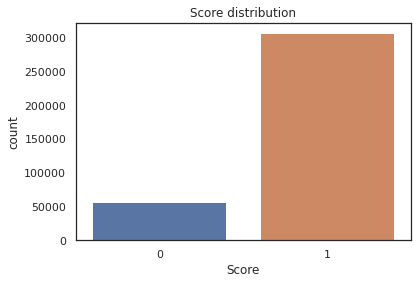

In [51]:
#data points for each class
print(data['Score'].value_counts())
print("*"*50)

#Count plot for Score
sns.countplot('Score',data = data)
plt.title("Score distribution")

## Text Preprocessing: Stemming, stop-word removal and Lemmatization.

In [52]:
#set of stopwords
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

import re
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')                      


#function to clean the word of any html-tags
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
data['CleanedText'] = data['Text'].apply(final_sentence)
print(data.shape)
data.head()

(364159, 11)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several Vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled Jumbo Salted peanuts a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around pillowy citrus gelatin nuts ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient Robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy great wide assortment yummy Delive...


### Converting Text data into vector 

In [54]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)

    print("the type of count vectorizer ",type(final_array))
    print("the shape of out text BOW vectorizer ",final_array.get_shape())
    print("the number of unique words including both unigrams and bigrams ", final_array.get_shape()[1])
    
    return model_vect, final_array

## Spliting data

In [63]:
#split data into train, cross validate and test 
from sklearn.model_selection import train_test_split

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    X_tr, X_cv, Y_tr, Y_cv = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train

## Normalize Data

In [60]:
#Normalize Data
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)

    print("Train Data Size ",train.get_shape())
    print("CV Data Size: ",cv.shape)
    print("Test Data Size: ",test.shape)
    
    return train, cv, test

### Training Multinomial Naive Bayes Model

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pylab as pyplt

def Multinomial_NB(X_train,X_cv,Y_train,Y_cv):
    #############################################################################
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
    #############################################################################

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(X_cv)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]
        #############################################################################

        auc_score_cv = roc_auc_score(Y_cv,probs)            #auc roc for cv
        auc_score_train = roc_auc_score(Y_train,prob)       #auc roc for train
        #############################################################################

        print(i," ------> ",auc_score_cv)
        #############################################################################

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)
        #############################################################################

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i

    print("*"*100)
    print(f"\n Best alpha Value {best_alpha} with highest roc_auc Score is {max_roc_auc}")
    print("*"*100)
    #############################################################################

    sns.set_style("darkgrid")
    plt.xscale('log')
    plt.plot(alpha, pred_cv,'r-', label = 'CV Data')
    plt.plot(alpha,pred_train,'g-', label ='Train Data')
    plt.legend(loc='upper right')
    plt.title(r'Auc Score v/s $\alpha$')
    plt.xlabel(r"alpha values",fontsize=12)
    plt.ylabel("roc_auc",fontsize=12)
    plt.show()
    print("*"*100)
    #############################################################################

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_cv,probs)
    # plot no skill
    pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplt.plot(fpr, tpr, marker='.')
    pyplt.title("Line Plot of ROC Curve on Train Data")
    pyplt.ylabel('True Positive Rate')
    pyplt.xlabel('False Positive Rate')
    pyplt.show()
    print("*"*100)
    
    #############################################################################
    return best_alpha

### Testing Multinomial Naive Bayes Model

In [97]:
import sklearn.metrics as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    #############################################################################
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]            # keep probabilities for the positive outcome only

    #############################################################################
    roc_auc = roc_auc_score(Y_test,probs)
    print("AUC Score",roc_auc)
    print("*"*70)
    #############################################################################'

    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(Y_test,probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("Line Plot of ROC Curve on Test Data")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

    #############################################################################
    prediction=bnb.predict(X_test)
    metrics.confusion_matrix(Y_test,prediction)
    #############################################################################

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("*"*70)
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("*"*70)
    
    return bnb,roc_auc

    #############################################################################

### Top features

In [83]:
def Important_features(model, classifier):
    neg = classifier.feature_log_prob_[0].argsort()
    pos = classifier.feature_log_prob_[1].argsort()
    top_pos_words = np.take(model.get_feature_names(),pos)
    top_neg_words = np.take(model.get_feature_names(),neg)
    imp_df = pd.DataFrame(columns = ['Pos_Words','Pos_Importance','Neg_Words','Neg_Importance'])
    imp_df['Pos_Words'] = top_pos_words[::-1]
    imp_df['Pos_Importance'] = np.take(classifier.feature_log_prob_[1],pos)[::-1]
    imp_df['Neg_Words'] = top_neg_words[::-1]
    imp_df['Neg_Importance'] = np.take(classifier.feature_log_prob_[0],neg)[::-1]
    return imp_df

### Individual Prediction

In [84]:
def Individual_Prediction(model, classifier, review):
    review = final_sentence(review)
    review_vec = model.transform([review])
    review_vec = preprocessing.normalize(review_vec)
    pred = classifier.predict(review_vec)

    return "positive review" if pred[0] == 1 else "negative review"

## Bag of Words (BoW)

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

BOW, X = Text_Into_Vector(CountVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (364159, 3474639)
the number of unique words including both unigrams and bigrams  3474639


In [86]:
BOW.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [87]:
BOW.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [88]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

Running SMOTE

In [89]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_cv,Y_cv = sm.fit_resample(X_cv,Y_cv)
X_tr,Y_tr = sm.fit_resample(X_tr,Y_tr)
print(Y_cv.value_counts())
Y_tr.value_counts()

1    67763
0    67763
Name: Score, dtype: int64


1    137982
0    137982
Name: Score, dtype: int64

In [90]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120173, 3474639) (120173,)
X_tr, Y_tr (275964, 3474639) (275964,)
X_cv, Y_cv (135526, 3474639) (135526,)
X_Train, Y_Train (243986, 3474639) (243986,)


In [91]:
# Normalization

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275964, 3474639)
CV Data Size:  (135526, 3474639)
Test Data Size:  (120173, 3474639)


#### Navie Bayes for BOW

10000  ------>  0.8896129064736407
5000  ------>  0.8954181561998743
1000  ------>  0.9146519397136785
500  ------>  0.9234872109494312
100  ------>  0.9401023541239172
50  ------>  0.9453942608053728
10  ------>  0.9548157491742146
5  ------>  0.9582958094752778
1  ------>  0.9672586152111438
0.5  ------>  0.9716662530594387
0.1  ------>  0.9666303627141346
0.05  ------>  0.9513011139429804
0.01  ------>  0.9347530432409291
0.005  ------>  0.9387349099952003
0.001  ------>  0.9491464667622816
0.0005  ------>  0.9516711860401377
0.0001  ------>  0.9543443332575046
5e-05  ------>  0.9546645726538489
1e-05  ------>  0.9541641671689193
****************************************************************************************************

 Best alpha Value 0.5 with highest roc_auc Score is 0.9716662530594387
****************************************************************************************************


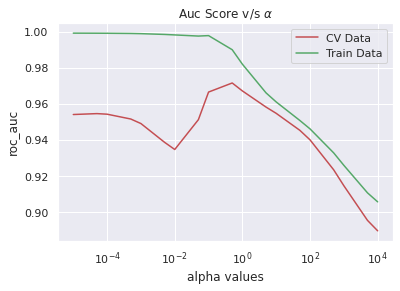

****************************************************************************************************


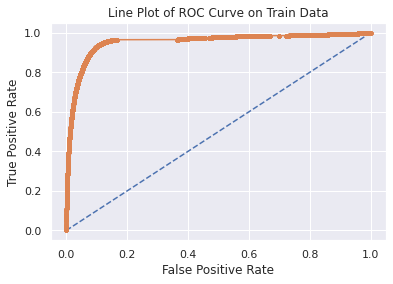

****************************************************************************************************


In [92]:
#training NB 

best_alpha_bow = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.8771026823657794
**********************************************************************


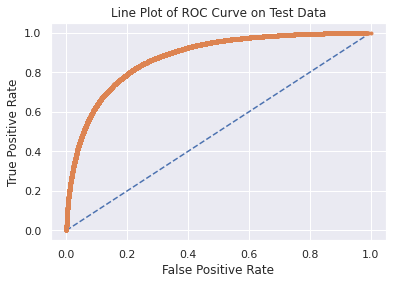

macro f1 score for data : 0.5404333594393012
micro f1 score for data: 0.8556996995997436
hamming loss for data: 0.1443003004002563
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.93      0.09      0.16     18864
           1       0.85      1.00      0.92    101309

    accuracy                           0.86    120173
   macro avg       0.89      0.54      0.54    120173
weighted avg       0.87      0.86      0.80    120173

**********************************************************************


In [98]:
# Testing NB Model
from sklearn.metrics import plot_confusion_matrix

NB_bow, roc_auc_bow = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_bow)

In [100]:
# Top features using NB and BOW

Important_features(BOW, NB_bow)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,like,-6.090527,like,-5.559328
1,great,-6.159834,would,-6.189845
2,good,-6.270802,product,-6.223373
3,love,-6.367118,taste,-6.258481
4,one,-6.524727,coffee,-6.364732
...,...,...,...,...
3474634,salad thought,-15.488430,photo experience,-15.222974
3474635,tin havent,-15.488430,photo expected,-15.222974
3474636,imatcha,-15.488430,photo expect,-15.222974
3474637,imatcha green,-15.488430,photo evidence,-15.222974


## TF-IDF

In [101]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

TfIdf, X = Text_Into_Vector(TfidfVectorizer,data['CleanedText'])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (364159, 3474639)
the number of unique words including both unigrams and bigrams  3474639


In [102]:
TfIdf.get_feature_names()[:20]

['aaa',
 'aaa aaa',
 'aaa able',
 'aaa class',
 'aaa cola',
 'aaa condition',
 'aaa dont',
 'aaa hockey',
 'aaa job',
 'aaa magazine',
 'aaa plus',
 'aaa rating',
 'aaa tue',
 'aaaa',
 'aaaaaaaaagghh',
 'aaaaaaarrrrrggghhh',
 'aaaaaaarrrrrggghhh dark',
 'aaaaaah',
 'aaaaaah melt',
 'aaaaaahhh']

In [103]:
TfIdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [113]:
#split data into train, cross validate and test 

X_tr, X_cv, X_test, Y_tr, Y_test, Y_cv, X_train, Y_train = Split_data(X, data['Score'])

In [114]:
sm = SMOTE()
X_cv,Y_cv = sm.fit_resample(X_cv,Y_cv)
X_tr,Y_tr = sm.fit_resample(X_tr,Y_tr)
print(Y_cv.value_counts())
Y_tr.value_counts()

1    67763
0    67763
Name: Score, dtype: int64


1    137982
0    137982
Name: Score, dtype: int64

In [116]:
print('X_test, Y_test', X_test.shape, Y_test.shape)
print('X_tr, Y_tr', X_tr.shape, Y_tr.shape)
print('X_cv, Y_cv', X_cv.shape, Y_cv.shape)
print('X_Train, Y_Train', X_train.shape, Y_train.shape)

X_test, Y_test (120173, 3474639) (120173,)
X_tr, Y_tr (275964, 3474639) (275964,)
X_cv, Y_cv (135526, 3474639) (135526,)
X_Train, Y_Train (243986, 3474639) (243986,)


In [117]:
# Normalize Data

X_tr, X_cv, X_test = Normalization(X_tr, X_cv, X_test)

Train Data Size  (275964, 3474639)
CV Data Size:  (135526, 3474639)
Test Data Size:  (120173, 3474639)


#### Naive bayes for TF-idf

10000  ------>  0.9177351161331022
5000  ------>  0.9207641565510476
1000  ------>  0.9324406927220039
500  ------>  0.938226481990539
100  ------>  0.9497746530546649
50  ------>  0.9534945228430851
10  ------>  0.9589242187727157
5  ------>  0.9598487668049904
1  ------>  0.9576879312340237
0.5  ------>  0.953803684724671
0.1  ------>  0.934140484724645
0.05  ------>  0.9216137115114348
0.01  ------>  0.8895261361650801
0.005  ------>  0.8763530100231065
0.001  ------>  0.8498410645479575
0.0005  ------>  0.8402453879980003
0.0001  ------>  0.8216007859076191
5e-05  ------>  0.8148813940353647
1e-05  ------>  0.801664283848583
****************************************************************************************************

 Best alpha Value 5 with highest roc_auc Score is 0.9598487668049904
****************************************************************************************************


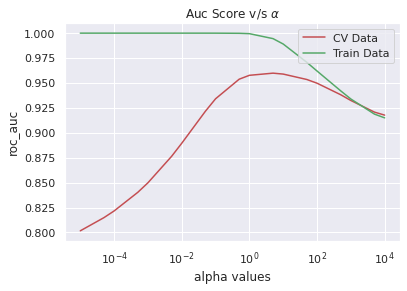

****************************************************************************************************


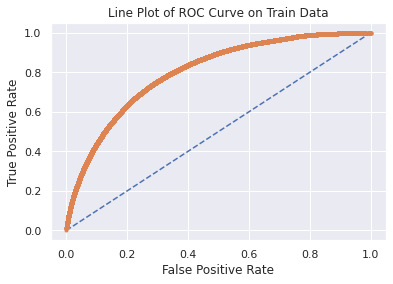

****************************************************************************************************


In [118]:
#Training NB model

best_alpha_idf = Multinomial_NB(X_tr,X_cv,Y_tr,Y_cv)

AUC Score 0.9424947876005381
**********************************************************************


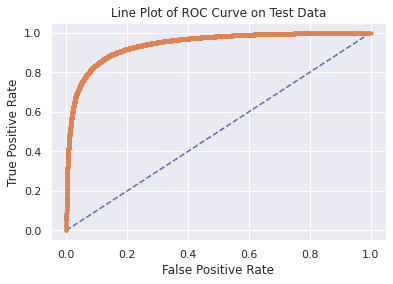

macro f1 score for data : 0.750737260951058
micro f1 score for data: 0.8208416199978364
hamming loss for data: 0.17915838000216355
**********************************************************************
Precision recall report for data:
               precision    recall  f1-score   support

           0       0.46      0.93      0.62     18864
           1       0.98      0.80      0.88    101309

    accuracy                           0.82    120173
   macro avg       0.72      0.86      0.75    120173
weighted avg       0.90      0.82      0.84    120173

**********************************************************************


In [119]:
# Testing NB Model

NB_tfidf, roc_auc_idf = Testing_model(X_tr,Y_tr,X_test,Y_test,best_alpha_idf)

In [120]:
# Top features using NB and tfidf

Important_features(TfIdf, NB_tfidf)

,Pos_Words,Pos_Importance,Neg_Words,Neg_Importance
0,great,-9.218840,like,-8.872524
1,like,-9.278796,taste,-9.122776
2,good,-9.344292,product,-9.190727
3,love,-9.371787,would,-9.191646
4,coffee,-9.564105,coffee,-9.443829
...,...,...,...,...
3474634,gotta stacys,-15.110756,photo experience,-15.116239
3474635,truck cans,-15.110756,photo expected,-15.116239
3474636,gotta starting,-15.110756,photo expect,-15.116239
3474637,gotta stay,-15.110756,photo evidence,-15.116239


## Conclusion

In [121]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyperameter(alpha)","Test Auc Score"]

####################################################################################
x.add_row(["BoW","MultinomialNB",best_alpha_bow, roc_auc_bow])
x.add_row(["Tf-Idf","MultinomialNB",best_alpha_idf, roc_auc_idf])

####################################################################################
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
####################################################################################
printmd('****Final Conclusion for MultiNomialNB Model:****')
print(x)

****Final Conclusion for MultiNomialNB Model:****

+------------+---------------+--------------------+--------------------+
| Vectorizer |     Model     | Hyperameter(alpha) |   Test Auc Score   |
+------------+---------------+--------------------+--------------------+
|    BoW     | MultinomialNB |        0.5         | 0.8771026823657794 |
|   Tf-Idf   | MultinomialNB |         5          | 0.9424947876005381 |
+------------+---------------+--------------------+--------------------+


# =============================================================

### Individual prediction

In [124]:
# Individual prediction
review = """Great, healthier alternative to the usual bhujia we Indians are used to having along with our tea or our beer.
            Much less salt than traditional tea snacks as well. I love the variety of texture as well with the very 
            crunchy peas to soft cheese bits, the sesame seed coated snack to good old roasted peanuts. It is pretty 
            expensive though, at 600rs at a kilo perhaps the most expensive tea snack Ive ever had."""

print("Prediction using BOW:", Individual_Prediction(BOW, NB_bow, review))
print("Prediction using TF-Idf:", Individual_Prediction(TfIdf, NB_tfidf, review))

Prediction using BOW: positive review
Prediction using TF-Idf: positive review
